(sec:titanic)=
# 판다스 실전: 타이타닉 데이터셋

**주요 내용**

타이타닉<font size='2'>Titanic</font> 데이터셋을 데이터프레임으로 불러와서 전처리 하는 과정을 살펴 본다.

**기본 설정**

In [1]:
import pandas as pd
import numpy as np

랜덤 시드, 어레이 내부에 사용되는 부동소수점의 정확도(여기서는 소수점 이하 네자리까지 표시)를 지정한다.

In [2]:
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

그래프 크기를 지정한다.

In [3]:
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(10, 6))

사이킷런<font size='2'>scikit-learn</font> 라이브러리를 일부 이용한다.

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

**참고**: 

- https://jaketae.github.io/study/sklearn-pipeline/

**주의사항**

열의 라벨을 데이터의 **특성**<font size='2'>feature</font>로 부르는
관습을 따라 여기서도 특성 표현을 사용한다.

## 타이타닉 데이터셋 불러오기

타이타닉 데이터셋을 불러온다.

- `fetch_openml()`: [openml](https://www.openml.org)에서 제공하는 데이터셋을 가져오는 함수.
- 여기서는 [타이타닉 데이터셋](https://www.openml.org/search?type=data&status=active&id=40945) 지정.

In [5]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True, parser='auto')

- 1309명 승객의 데이터 포함. 

- `X`: 13개의 열(특성) 사용.

| 열 특성 | 의미 |
| :--- | :--- |
| Pclass | 승객 클래스(1 = 1등석; 2 = 2등석; 3 = 3등석) |
| name | 이름 |
| sex | 성(male=남성, female=여성) |
| age | 나이 |
| sibsp | 함께 승선한 형제, 자매, 배우자 수 |
| parch | 함께 승선한 부모 자식 수 |
| ticket | 티켓 번호 |
| fare | 티켓 요금 (영국 파운드) |
| cabin | 객실 번호 |
| embarked | 승선한 항구 (C = Cherbourg; Q = Queenstown; S = Southampton) |
| boat | 침몰시 탑승한 구명보트 번호 |
| body | 사망자인 경우 지정된 번호 |
| home.dest | 고향/목적지 |

In [6]:
X.shape

(1309, 13)

In [7]:
X.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

- `y`: 1309명 승객의 생존 여부를 담은 시리즈. 
- 시리즈의 이름은 `survived`

| 열 특성 | 의미 |
| :--- | :--- |
| survived | 생존 여부 (0 = 사망; 1 = 생존) |`

In [8]:
y.name

'survived'

`'boat'`, `'body'`, `'home.dest'`, `ticket` 등을 특성으로 갖는 열은 생존 여부와 상관 없는 정보이기에 삭제한다.

In [9]:
X.drop(['boat', 'body', 'home.dest', 'ticket'], axis=1, inplace=True)
X.head()

,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,B5,S
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,C22 C26,S
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,C22 C26,S
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,C22 C26,S
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,C22 C26,S


## 생존여부 상관관계

생존 여부 데이터를 `X`와 합친다.

In [10]:
X_comb = pd.concat([y.astype(float), X], axis=1)
X_comb

,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,B5,S
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,C22 C26,S
2,0.0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,C22 C26,S
3,0.0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,C22 C26,S
4,0.0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...
1304,0.0,3,"Zabour, Miss. Hileni",female,14.5000,1,0,14.4542,NaN,C
1305,0.0,3,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,NaN,C
1306,0.0,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,7.2250,NaN,C
1307,0.0,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,7.2250,NaN,C


생존 여부 특성과 다른 특성들과의 상관관계를 확인한다.

In [11]:
import seaborn as sns

- `pclass`(승객 클래스) 특성과의 연관성이 가장 높음. 상위 클래스의 승객이 생존률이 높음.
- `fare`(티켓 가격) 특성 또한 동일한 이유로 생존 여부에 중요하게 연관됨.

<Axes: >

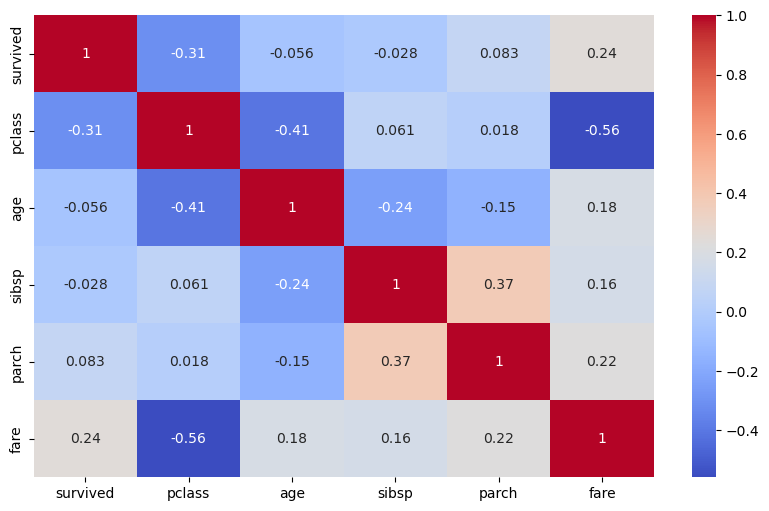

In [12]:
sns.heatmap(X_comb[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr(),
            annot=True, 
            cmap = "coolwarm")

## 데이터셋 살펴보기

결측치의 존재 여부를 각 열에 대해 확인한다.

In [13]:
X.isnull().any()

pclass      False
name        False
sex         False
age          True
sibsp       False
parch       False
fare         True
cabin        True
embarked     True
dtype: bool

결측치의 수를 각 열에 대해 확인한다.

In [14]:
X.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
fare           1
cabin       1014
embarked       2
dtype: int64

결측치의 비율을 각 열에 대해 계산한다.

In [15]:
X.isnull().sum()/len(X) * 100

pclass       0.000000
name         0.000000
sex          0.000000
age         20.091673
sibsp        0.000000
parch        0.000000
fare         0.076394
cabin       77.463713
embarked     0.152788
dtype: float64

객실(`cabin`) 열에 너무 많은 누락치가 있기에 데이터분석에 도움이 되지 않는다.
따라서 삭제한다.

In [16]:
X.drop(['cabin'], axis=1, inplace=True)

다시 누락치 수를 열별로 확인한다.

In [17]:
X.isnull().sum()

pclass        0
name          0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

### 데이터 전처리

형제자매, 배우자, 부모자식 수를 하나로 합쳐서
`family_size` 특성(열)로 추가한다.

In [18]:
X['family_size'] = pd.concat([X['parch'], X['sibsp']], axis=1).sum(axis=1)
X

,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,3
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,3
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,3
...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,14.4542,C,1
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C,1
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,7.2250,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,7.2250,C,0


`parch`, `sibsp` 두 특성을 삭제한다.

In [19]:
X.drop(['parch', 'sibsp'], axis=1, inplace=True)
X

,pclass,name,sex,age,fare,embarked,family_size
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,S,0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,S,3
2,1,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,S,3
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,S,3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,S,3
...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,14.4542,C,1
1305,3,"Zabour, Miss. Thamine",female,NaN,14.4542,C,1
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,7.2250,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,7.2250,C,0


가족이 없는지 여부를 확인하는 특성 `is_alone`을 추가한다.

- 먼저 1로 지정한다.

In [20]:
X['is_alone'] = 1
X

,pclass,name,sex,age,fare,embarked,family_size,is_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,S,0,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,S,3,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,S,3,1
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,S,3,1
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,S,3,1
...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,14.4542,C,1,1
1305,3,"Zabour, Miss. Thamine",female,NaN,14.4542,C,1,1
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,7.2250,C,0,1
1307,3,"Zakarian, Mr. Ortin",male,27.0000,7.2250,C,0,1


이제 `family_size` 특성이 0이 아닌 경우 0으로 처리한다.

In [21]:
mask = X['family_size'] > 0
X.loc[mask, 'is_alone'] = 0
X

,pclass,name,sex,age,fare,embarked,family_size,is_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,S,0,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,S,3,0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,S,3,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,S,3,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,S,3,0
...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,14.4542,C,1,0
1305,3,"Zabour, Miss. Thamine",female,NaN,14.4542,C,1,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,7.2250,C,0,1
1307,3,"Zakarian, Mr. Ortin",male,27.0000,7.2250,C,0,1


이름 특성을 제거하는 대신 호칭(`title`) 특성을 추가한다.

In [22]:
X['title'] =  X['name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
X.drop(["name"], axis=1, inplace=True)

X.head()

,pclass,sex,age,fare,embarked,family_size,is_alone,title
0,1,female,29.0000,211.3375,S,0,1,Miss
1,1,male,0.9167,151.5500,S,3,0,Master
2,1,female,2.0000,151.5500,S,3,0,Miss
3,1,male,30.0000,151.5500,S,3,0,Mr
4,1,female,25.0000,151.5500,S,3,0,Mrs


호칭에 따른 남녀 숫자를 확인하기 위해 `pd.crosstab()` 함수를 이용한다.

In [23]:
pd.crosstab(X['title'], X['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


`Miss`와 `Mrs`의 생존율이 거의 비슷하다.

In [24]:
print(f"Miss: {np.sum(y.astype(int)[X.title == 'Miss']) / len(X.title == 'Miss')}")
print(f"Mrs: {np.sum(y.astype(int)[X.title == 'Mrs']) / len(X.title == 'Mrs')}")

Miss: 0.13445378151260504
Mrs: 0.11841100076394194


따라서 `Mrs` 로 통일한다. 또한 `Ms` 호칭도 2명 밖에 없기에 역시 `Mrs`로 통일한다.

In [25]:
mask = (X.title == 'Miss') | (X.title == 'Ms')
X.loc[mask, 'title'] = 'Mrs'
X

,pclass,sex,age,fare,embarked,family_size,is_alone,title
0,1,female,29.0000,211.3375,S,0,1,Mrs
1,1,male,0.9167,151.5500,S,3,0,Master
2,1,female,2.0000,151.5500,S,3,0,Mrs
3,1,male,30.0000,151.5500,S,3,0,Mr
4,1,female,25.0000,151.5500,S,3,0,Mrs
...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,14.4542,C,1,0,Mrs
1305,3,female,NaN,14.4542,C,1,0,Mrs
1306,3,male,26.5000,7.2250,C,0,1,Mr
1307,3,male,27.0000,7.2250,C,0,1,Mr


In [26]:
(X.title == 'Mrs').sum()

459

10명 이하의 사람에게만 사용되는 호칭은 `rare`로 통일시킨다.

In [27]:
rare_titles = (X['title'].value_counts() < 10)
rare_titles

Mr              False
Mrs             False
Master          False
Dr               True
Rev              True
Col              True
Major            True
Mlle             True
Mme              True
Capt             True
Lady             True
Sir              True
Dona             True
Jonkheer         True
the Countess     True
Don              True
Name: title, dtype: bool

In [28]:
X['title'] = X.title.apply(lambda x: 'rare' if rare_titles[x] else x)
X

,pclass,sex,age,fare,embarked,family_size,is_alone,title
0,1,female,29.0000,211.3375,S,0,1,Mrs
1,1,male,0.9167,151.5500,S,3,0,Master
2,1,female,2.0000,151.5500,S,3,0,Mrs
3,1,male,30.0000,151.5500,S,3,0,Mr
4,1,female,25.0000,151.5500,S,3,0,Mrs
...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,14.4542,C,1,0,Mrs
1305,3,female,NaN,14.4542,C,1,0,Mrs
1306,3,male,26.5000,7.2250,C,0,1,Mr
1307,3,male,27.0000,7.2250,C,0,1,Mr


In [29]:
(X.title == 'rare').sum()

32

In [30]:
X.dtypes

pclass            int64
sex            category
age             float64
fare            float64
embarked       category
family_size       int64
is_alone          int64
title            object
dtype: object

**참고**: 

- https://www.jcchouinard.com/classification-machine-learning-project-in-scikit-learn/

In [31]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)

/home/gslee/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [32]:
from sklearn.datasets import fetch_openml
 
titanic = fetch_openml('titanic', version=1, as_frame=True)

/home/gslee/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [33]:
type(titanic)

sklearn.utils._bunch.Bunch

In [34]:
df = titanic['data']
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [35]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [36]:
df['survived'] = titanic['target']

In [37]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


In [38]:
df.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.837836,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


**결측치 확인과 시각화**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    object  
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(5), object(6)
memory usage: 116.8+ KB


In [40]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

In [41]:
miss_vals = pd.DataFrame(df.isnull().sum() / len(df) * 100)
miss_vals

,0
pclass,0.000000
name,0.000000
sex,0.000000
age,20.091673
sibsp,0.000000
parch,0.000000
ticket,0.000000
fare,0.076394
cabin,77.463713
embarked,0.152788


[`seaborn.set_theme()` 함수](https://seaborn.pydata.org/generated/seaborn.set_theme.html)를 이용하면 보다 세련된 그래프를 그린다.

In [42]:
sns.set_theme()

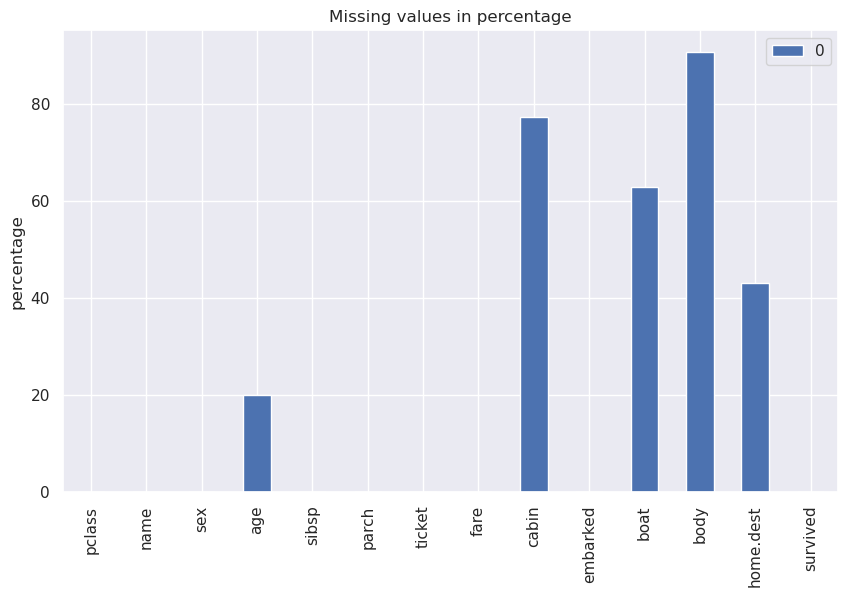

In [43]:
miss_vals.plot(kind='bar',
               title='Missing values in percentage',
               ylabel='percentage'
              )
 
plt.show()

**타깃 시각화**

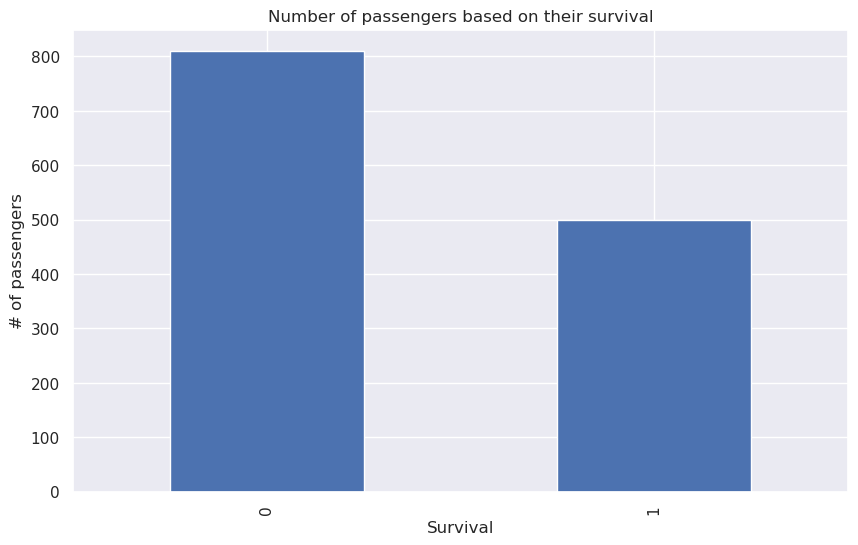

In [44]:
df.survived.value_counts().plot(kind='bar')
 
plt.xlabel('Survival')
plt.ylabel('# of passengers')
plt.title('Number of passengers based on their survival')
plt.show()

**연령별 생존자**

In [45]:
df.age.dropna()

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

In [46]:
df['age'][df.survived == '1'].dropna()

0       29.0000
1        0.9167
5       48.0000
6       63.0000
8       53.0000
         ...   
1261    63.0000
1277    22.0000
1286    38.0000
1290    47.0000
1300    15.0000
Name: age, Length: 427, dtype: float64

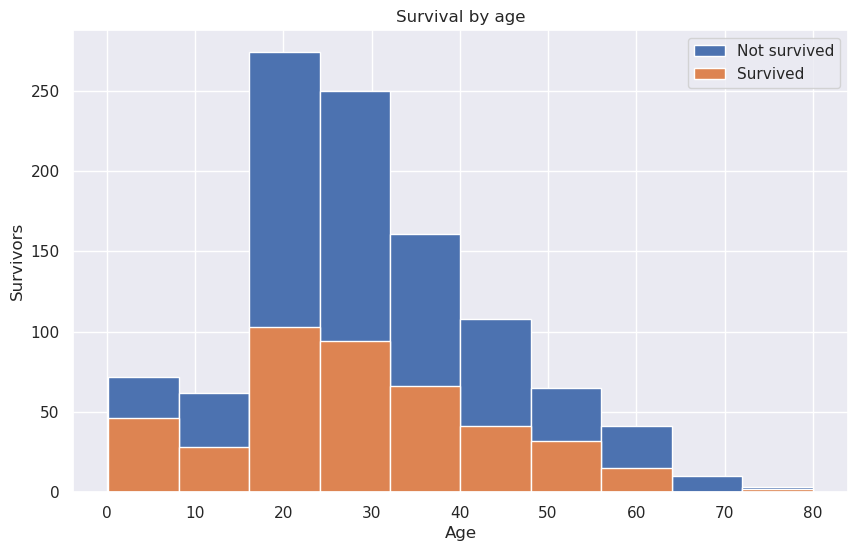

In [47]:
fig, ax = plt.subplots()
 
ax.hist(df.age.dropna(), label='Not survived')
ax.hist(df['age'][df.survived == '1'].dropna(), label='Survived')
 
plt.ylabel('Survivors')
plt.xlabel('Age')
plt.title('Survival by age')
plt.legend()
plt.show()

**성별 생존률**

In [48]:
((df['survived'][df.sex == 'male']) == 1).sum()

0

In [49]:
161/843

0.19098457888493475

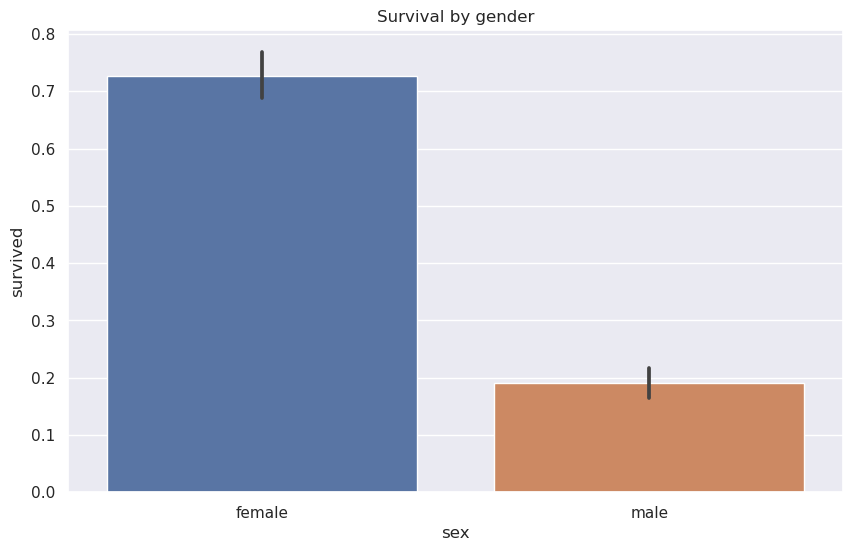

In [50]:
df['survived'] = df.survived.astype('int')
 
sns.barplot(data=df, 
            x='sex',
            y='survived'
           )
 
plt.title('Survival by gender')
plt.show()

**참고: `sns.barplot()` 함수**

<Axes: xlabel='island', ylabel='body_mass_g'>

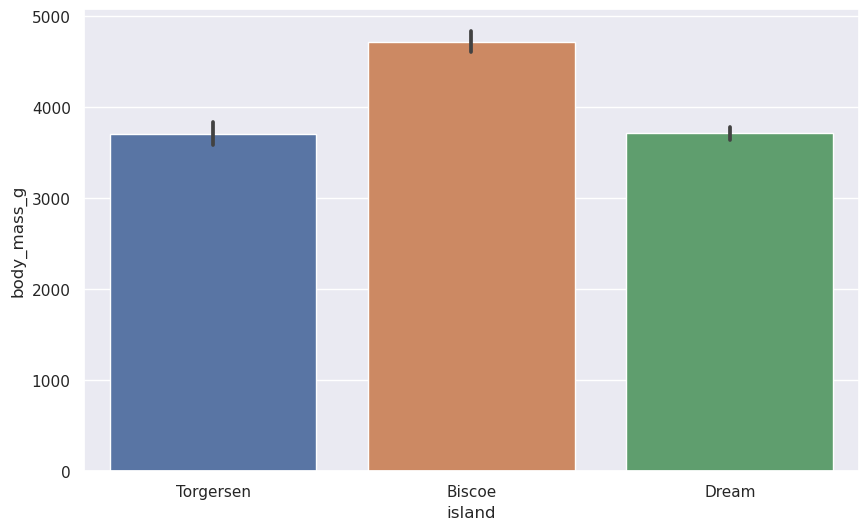

In [51]:
df_1 = sns.load_dataset("penguins")
sns.barplot(data=df_1, x="island", y="body_mass_g")

In [52]:
df_1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='island', ylabel='body_mass_g'>

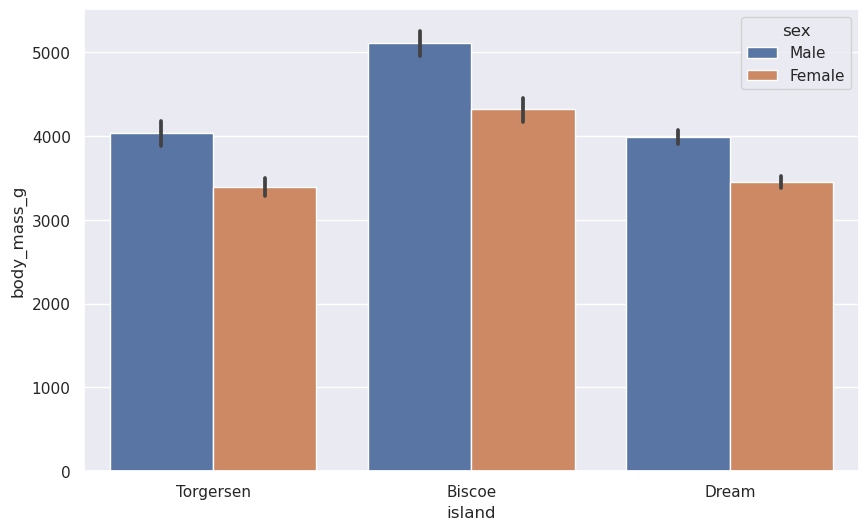

In [53]:
sns.barplot(data=df_1, x="island", y="body_mass_g", hue="sex")

- `errorbar` 옵션 인자
    - `ci`: confidence interval
    - `pi`: percentile interval
    - `se`: standard error
    - `sd`: standard deviation
    
- 참고: [Statistical estimation and error bars](https://seaborn.pydata.org/tutorial/error_bars.html)

<Axes: xlabel='island', ylabel='body_mass_g'>

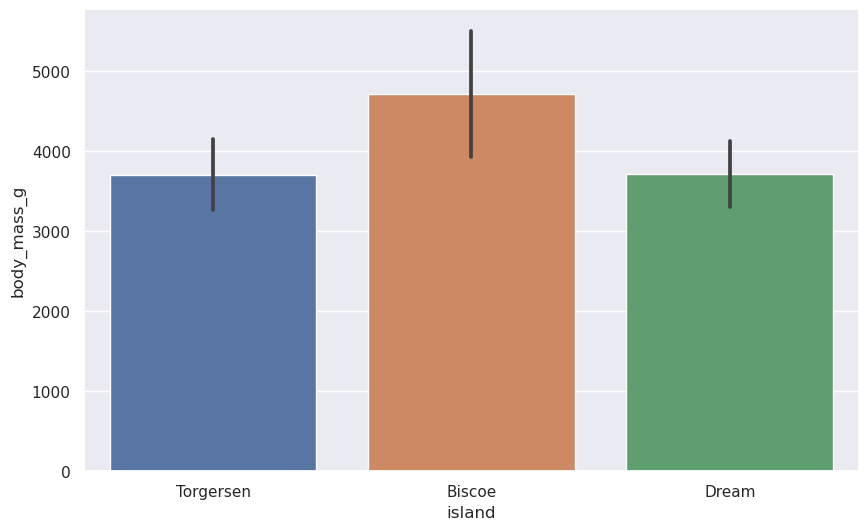

In [54]:
sns.barplot(data=df_1, x="island", y="body_mass_g", errorbar="sd") # 표준편차

**신분별 생존자**

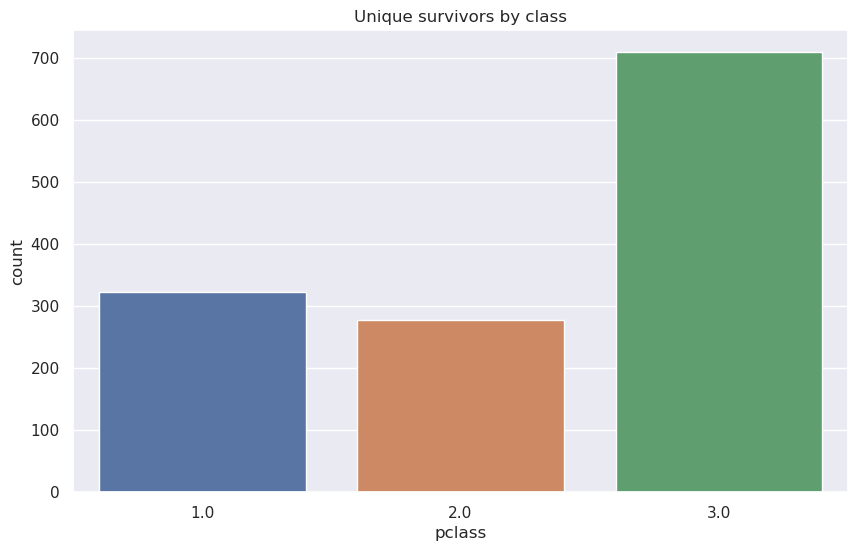

In [55]:
sns.countplot(x='pclass', data=df)
plt.title('Unique survivors by class')
plt.show()

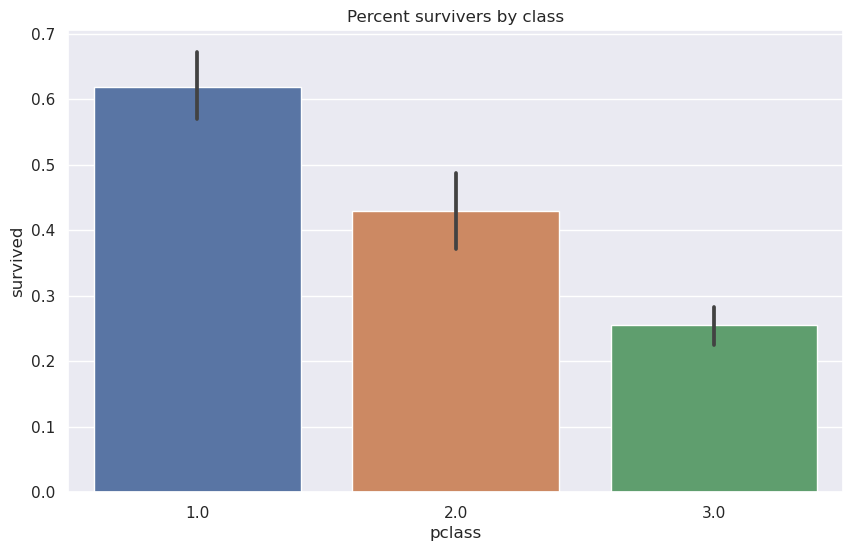

In [56]:
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Percent survivers by class')
plt.show()

**출발 항구별 생존률**

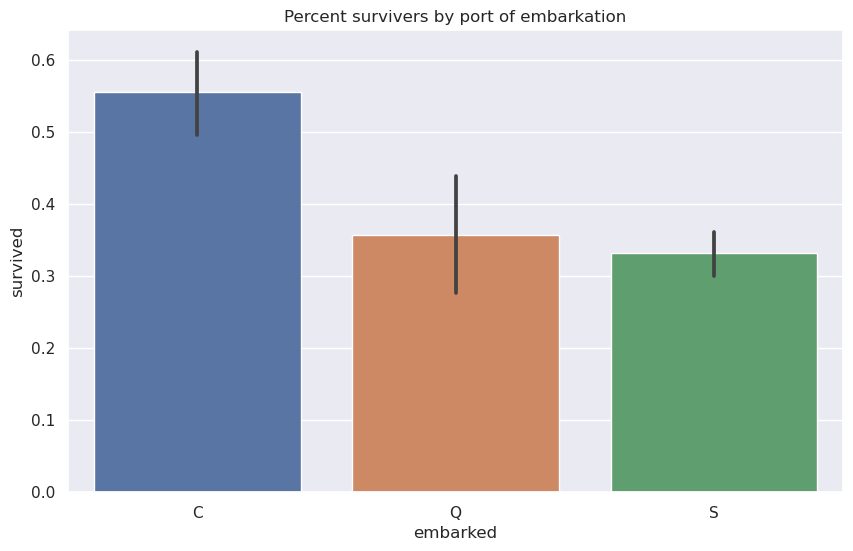

In [57]:
sns.barplot(x='embarked', y='survived', data=df)
plt.title('Percent survivers by port of embarkation')
plt.show()

**생존자 특성 분리**

In [58]:
X = df.drop('survived', axis=1)
y = df['survived']

**데이터 전처리**

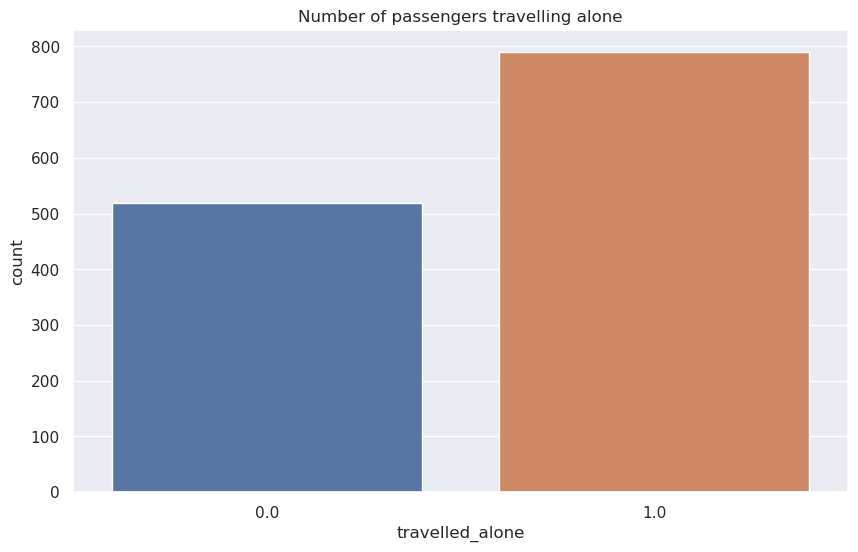

In [59]:
X['family'] = X['sibsp'] + X['parch']
X.loc[X['family'] > 0, 'travelled_alone'] = 0
X.loc[X['family'] == 0, 'travelled_alone'] = 1
X.drop(['family', 'sibsp', 'parch'], axis=1, inplace=True)
sns.countplot(x='travelled_alone', data=X)
plt.title('Number of passengers travelling alone')
plt.show()

### Preprocess Data with Scikit-learn

#### 결측치 처리

In [60]:
from sklearn.impute import SimpleImputer
 
def get_parameters(df):
    parameters = {}
    for col in df.columns[df.isnull().any()]:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64' or df[col].dtype =='int32':
            strategy = 'mean'
        else:
            strategy = 'most_frequent'
        missing_values = df[col][df[col].isnull()].values[0]
        parameters[col] = {'missing_values':missing_values, 'strategy':strategy}
    return parameters
 
parameters = get_parameters(X)
 
for col, param in parameters.items():
    missing_values = param['missing_values']
    strategy = param['strategy']
    imp = SimpleImputer(missing_values=missing_values, strategy=strategy)
    X[col] = imp.fit_transform(X[[col]])
 
X.isnull().sum()

ValueError: Input contains NaN

**참고**: 

- https://medium.datadriveninvestor.com/implementation-of-data-preprocessing-on-titanic-dataset-6c553bef0bc6